**Assignment 1**

---

a) Import data and create time index

In [11]:
import pandas as pd
df= pd.read_csv('tea.csv')
df.head()

,Date,Closing Price
0,10/3/2022,98.8
1,10/4/2022,94.5
2,10/5/2022,98.7
3,10/6/2022,98.5
4,10/7/2022,100.0


In [12]:
df.shape

(480, 2)

In [13]:
### Creating time index
import numpy as np

df['Time_index'] = np.arange(len(df.index))
df

,Date,Closing Price,Time_index
0,10/3/2022,98.80,0
1,10/4/2022,94.50,1
2,10/5/2022,98.70,2
3,10/6/2022,98.50,3
4,10/7/2022,100.00,4
...,...,...,...
475,9/25/2024,124.75,475
476,9/26/2024,122.00,476
477,9/27/2024,126.50,477
478,9/30/2024,126.25,478




---


**b) taking Log returns**


In [14]:

import numpy as np
df['log_Close'] = np.log(df['Closing Price'])
df.head()

,Date,Closing Price,Time_index,log_Close
0,10/3/2022,98.8,0,4.593098
1,10/4/2022,94.5,1,4.548600
2,10/5/2022,98.7,2,4.592085
3,10/6/2022,98.5,3,4.590057
4,10/7/2022,100.0,4,4.605170


In [15]:
# to take log returns

df['log_return'] = df['log_Close'].diff()
df.head()

,Date,Closing Price,Time_index,log_Close,log_return
0,10/3/2022,98.8,0,4.593098,NaN
1,10/4/2022,94.5,1,4.548600,-0.044498
2,10/5/2022,98.7,2,4.592085,0.043485
3,10/6/2022,98.5,3,4.590057,-0.002028
4,10/7/2022,100.0,4,4.605170,0.015114


plot the values of log returns

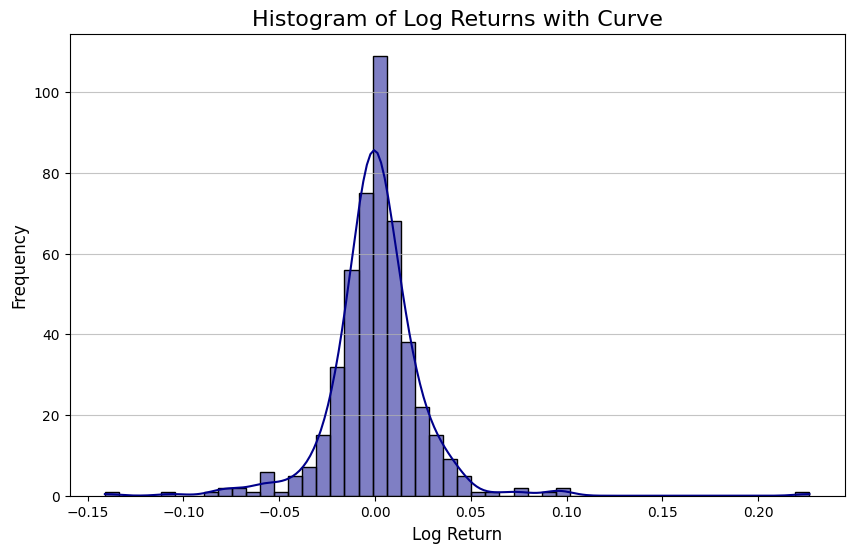

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['log_return'].dropna(), kde=True, bins=50, color='darkblue')
plt.title('Histogram of Log Returns with Curve', fontsize=16)
plt.xlabel('Log Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()



---


**c) Estimating drift parameter and Scale parameter**

In [17]:
# taking variance of log returns
sigma=df['log_return'].var()
print("Scale parameter is ",np.sqrt(sigma))
# taking means of log returns
m=df['log_return'].mean()
mu=m+0.5*sigma
print("drift parameter is ",mu)

Scale parameter is  0.02510194828589176
drift parameter is  0.0008268836813302578




---


**d) is this model is appropiate?**

1.1 checking  normality by qq plot

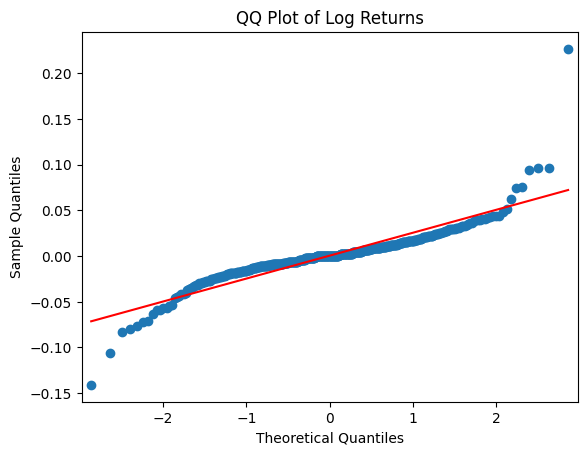

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df['log_return'].dropna(), line ='s')
plt.title('QQ Plot of Log Returns')
plt.show()

1.2 Tesinng Normality - Shapiro wilk test


In [19]:
# h0: the distribution is normal
#ha: the distribution is not normal
from scipy.stats import shapiro
stat, p = shapiro(df['log_return'].dropna())
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
        print('Reject h0, the distribution is not normal')
else:
        print('Fail to reject h0, the distribution is normal')

Statistics=0.837, p=0.000
Reject h0, the distribution is not normal


2. Testing Independence

In [20]:
# H0: The data is independently distributed (no autocorrelation)
# Ha: The data is not independently distributed (autocorrelation exists)

from statsmodels.stats.diagnostic import acorr_ljungbox

returns = df['log_return'].dropna()

# Perform the Ljung-Box test on the raw log-returns
# lags =10
# boxpierce=False performs only the Ljung-Box test (instead of both Box-Pierce and Ljung-Box)
lb_test = acorr_ljungbox(returns, lags=[10], boxpierce=False)

print("Ljung-Box Test Results for Raw Log-Returns:")
print(lb_test)


alpha = 0.05
p_value = lb_test['lb_pvalue'][10]

if p_value < alpha:
    print(f"\nWith a p-value of {p_value:.3f}, which is less than {alpha}, we reject the null hypothesis.")
    print("Conclusion: The raw log-returns are likely not independent.")
else:
    print(f"\nWith a p-value of {p_value:.3f}, which is greater than or equal to {alpha}, we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to conclude that the raw log-returns are not independent.")

Ljung-Box Test Results for Raw Log-Returns:
      lb_stat  lb_pvalue
10  25.753815   0.004086

With a p-value of 0.004, which is less than 0.05, we reject the null hypothesis.
Conclusion: The raw log-returns are likely not independent.


3. checking constant variance

<Axes: >

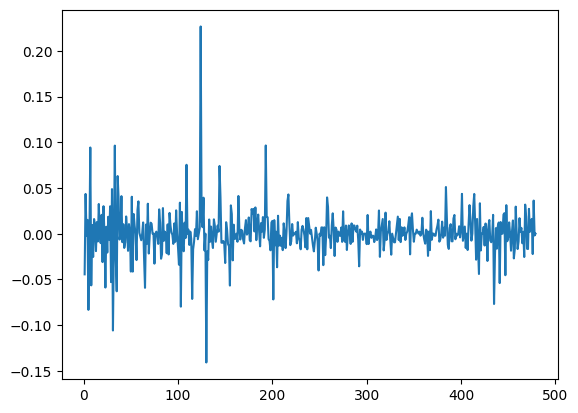

In [21]:
df["log_return"].plot()



---


**e) simulation process**



In [22]:
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
def BrownianG (m,T,N,sigma,mu,w0,GB=False):
  # if GB= True you can geneate sample paths from geomatric brownian motion

    # Arguments
    # m - Number of sample paths
    # T - total time
    # sigma= scale parameter
    # N - number of steps
    # mu - Drift parameter
    # w0 - starting time

    # Returns : numpy array with shape (m,N+1), where the first column
    # gives the initial values of each points

    # time steps
    dt=T/N# creating a array to store simulated values

    x=np.zeros((m,N+1))
    # initial values of x
    x[:,0]=w0
    x0=x[:,0]
    # creating a array to store simulated values

    if not GB:
      # for an each element of x0, generate a sample of n numbers from a normal distribution
      r=norm.rvs(size=x0.shape+(N,),  loc=mu*dt,scale=sigma*sqrt(dt))
      # this computes brownian motion by taking cumulative sum of random variables
      out=x[:,1:]
      np.cumsum(r , axis =-1, out=out)
      # adding initial value
      out += w0
    else:  # geomatric Brownian motion

      # for an each element of x0, generate a sample of n numbers from a normal distribution
      r=norm.rvs(size=x0.shape+(N,),loc=mu*dt,scale=sigma*sqrt(dt))
      # this computes brownian motion by taking cumulative sum of random variables
      out=x[:,1:]
      np.cumsum(r , axis =-1, out=out)
      if w0!= 0 :
        x[:,1:]=w0*np.exp(out)
      else:
        x[:,1:]=np.exp(x[:,1:])
    return x

    # m no of sample paths and N no of simulated values and
    #first columnis initial values



In [24]:
mu=df["log_return"].mean()
sigma=df["log_return"].std()
w0=df.iloc[-1]["Closing Price"]
w0

np.float64(126.25)

In [25]:
y=BrownianG(10000,20,20,sigma,mu,w0,GB=True)



---


**f) Plot the sample path**

In [26]:
def BrownianPlot(y,T):

  # arguments
  # y - array with shape(m,N+1) , Each row gives discritized version
  # of a sample path. There are m sample paths
  # T- total time

  # Returens
  # Agrapgh of all the sample paths

  # number of steps
  N=y.shape[1]
  # Length of the time step
  dt=T/(N-1)

  t=np.linspace(0.0,N*dt,N)
  for k in range(y.shape[0]):
      plt.plot(t,y[k])
  plt.xlabel('time',fontsize=15)
  plt.ylabel('W_t',fontsize=15)
  plt.grid(True)
  plt.show()

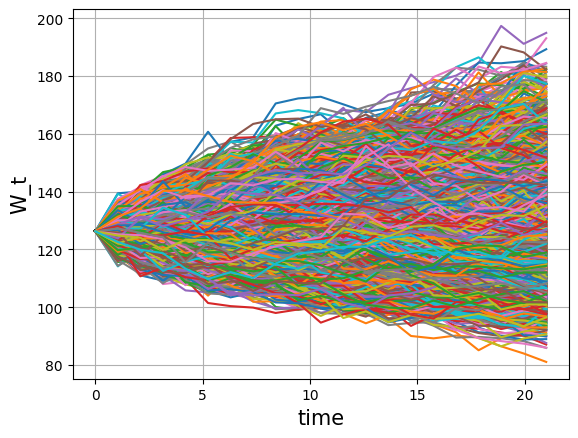

In [27]:
BrownianPlot(y,20)



---


**g)  Draw a box plot for the possible closing price values of TPL corresponding to
 the last day of the next 20-day period**

In [28]:
def BrownianEnd(y,T,loc):

  # arguments
  # y - array with shape(m,N+1) , Each row gives discritized version
  # of a sample path. There are m sample paths
  # T- total time

  # Returens
  # Agrapgh of all the sample paths

  # number of steps
  N=y.shape[1]
  # Length of the time step
  dt=T/(N-1)
  # the positio of the array corresponding to the given location
  pos=int(loc/dt)
  # boxplot
  plt.boxplot(y[:,pos])
  plt.show()

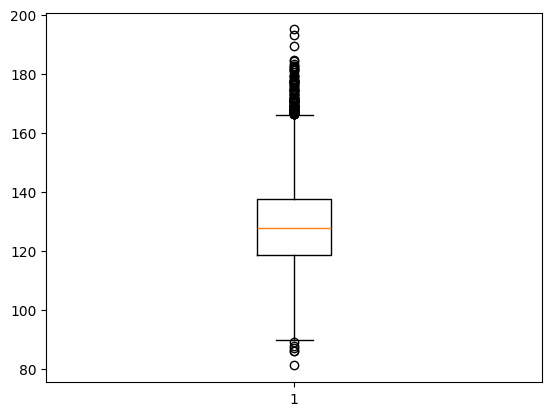

In [29]:
BrownianEnd(y,20,20)



---


**h) What is the probability that the closing price corresponding to the last day of
 the next 20-day period is between 130 and 140?**

In [30]:

dfGBM=pd.DataFrame(y.T)
dfGBM
#one column = one sample path

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,...,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000
1,126.611846,123.805842,126.381399,129.583357,131.481125,127.097475,128.313158,132.135714,124.376532,131.670138,...,128.312717,131.341478,125.051532,128.035483,123.845849,125.764519,125.214668,127.258402,124.787646,122.567423
2,125.083266,120.994339,132.418348,134.865719,127.531460,130.474931,126.892374,123.915025,118.746404,131.854353,...,128.377973,134.187360,126.546786,124.546400,130.979673,117.782602,124.907372,125.720741,124.026529,119.902236
3,122.936733,125.013903,133.255883,131.250279,128.363237,132.980245,128.180153,124.287777,119.072584,130.977478,...,125.951281,140.234685,123.701803,124.903120,127.999864,124.847511,123.591663,124.187895,119.816228,118.674886
4,120.627493,124.866477,131.626188,127.801324,128.938858,128.701016,128.266417,121.574530,117.197795,133.629063,...,124.430179,140.464128,122.295392,126.158128,130.101846,119.534331,120.678410,115.480355,123.325784,113.306102
5,119.550028,120.213030,127.446019,128.123863,123.859331,134.349918,129.903055,122.751943,115.880337,129.447111,...,122.340765,138.476611,119.009987,124.963791,133.047184,120.840487,115.907514,122.309597,123.164172,109.765729
6,121.459144,115.015977,129.522120,128.253972,121.479177,136.847594,134.276077,125.045733,116.046960,124.438501,...,121.069692,136.386558,119.094421,116.816203,140.218340,118.727235,115.691741,118.743133,122.058443,112.143531
7,120.507811,113.892879,129.841158,121.747765,119.931944,143.347016,131.815271,131.159901,120.850724,129.308385,...,121.619836,136.171985,117.034533,120.183828,139.247399,122.213365,118.653955,116.829243,119.907546,110.077638
8,121.769060,113.166586,136.735942,116.231885,120.102304,147.033440,128.726786,129.984678,123.901592,128.318243,...,119.102793,136.144293,116.059426,122.299304,138.863135,124.271270,121.056864,115.961579,122.533165,115.090621
9,122.852655,114.086663,133.099844,115.819883,117.447575,144.780661,124.582400,127.312207,123.749298,128.977916,...,118.404472,133.151128,115.959582,123.253429,136.065273,127.050291,122.837878,119.475837,121.976644,118.569777


In [31]:
EndingValuesGBM= dfGBM.loc[20]
EndingValuesGBM.describe()

,20
count,10000.000000
mean,128.379681
std,14.403927
min,81.032472
25%,118.368235
50%,127.630019
75%,137.435713
max,194.969802


In [32]:
len(EndingValuesGBM[(EndingValuesGBM>130)&(EndingValuesGBM<140)])/len(EndingValuesGBM)

0.2343



---


**i) Find the 95% prediction interval for the closing price value corresponding to the
 last day of the next 20-day period**

In [33]:
# 95% percentile interval for Ending values
np.percentile(EndingValuesGBM,[2.5,97.5])

array([102.47631089, 159.1395269 ])